# Momentos del dia VS Duración de los viajes



## Cantidad de viajes por cada horario del día


In [1]:
from root import *

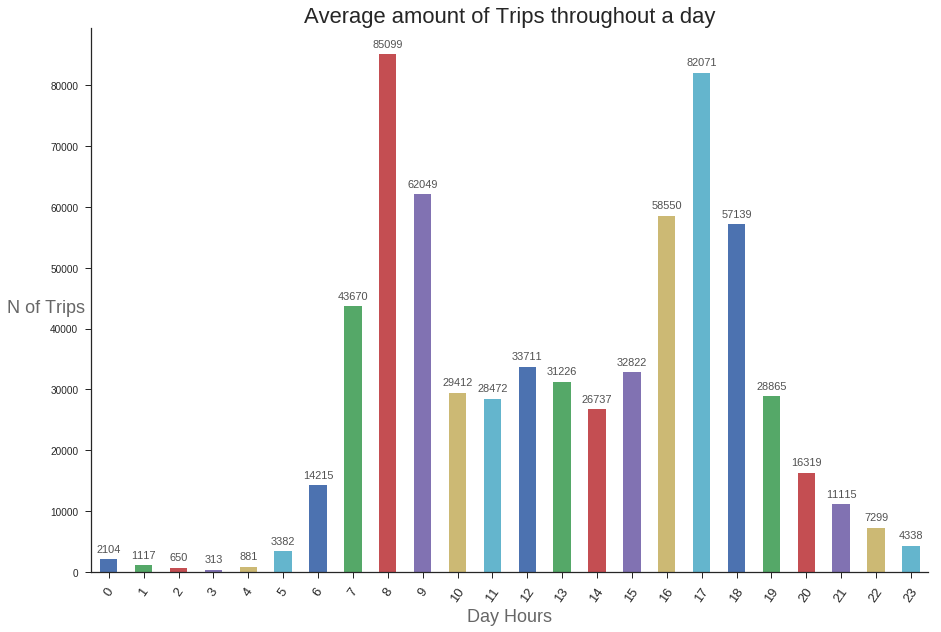

In [2]:
# ------------------------------------------------------------------------------
# RECORTO LOS VIAJES MENORES A 2 MINUTOS Y MAYORES A 6 HORAS
dfTripReduced = dfTrip[(2*60 <= dfTrip.duration) & (dfTrip.duration <= 6*3600)]
# ------------------------------------------------------------------------------

dfTripReduced = dfTripReduced[['start_date', 'duration']].sort_values(by=['start_date'])
#Se realiza conversión de segundos a minutos en duración para mayor claridad en los gráficos
dfTripReduced['duration'] = dfTripReduced['duration'].apply(lambda seconds: float(seconds)/60)


dfTripReduced['hour'] = dfTripReduced.apply(lambda row: row.start_date.hour, axis=1)

dfTripsByHour = dfTripReduced[['hour', 'duration']].groupby(by=['hour'])\
                    .agg(['mean', 'count'])['duration']\
                    .rename(columns={'mean': 'avg_duration', 'count':'trips'})

sns.set_style("ticks")

ax = dfTripsByHour.plot(kind='bar', y='trips', color=sns.color_palette(), legend=False)

ax.figure.set_size_inches(15, 10)
ax.set_title('Average amount of Trips throughout a day', size=22)
ax.set_xlabel('Day Hours', size=18, alpha=0.7)
ax.set_ylabel('N of Trips', size=18, rotation='horizontal', position=(0, 0.47), alpha=0.7)
plt.xticks(rotation=55, size=13)
autolabel(ax, 11, 0.8)
sns.despine()
plt.show()

## Calculo de promedio de duración de los viajes de acuerdo a momento del día

##### Debido a que la cantidad de viajes durante la madrugada (entre las 0 hs y las 4 hs) es menor, es probable  que los promedios de duración sean muy altos o bajos de acuerdo al caso por lo que no seran relevantes en el análisis 



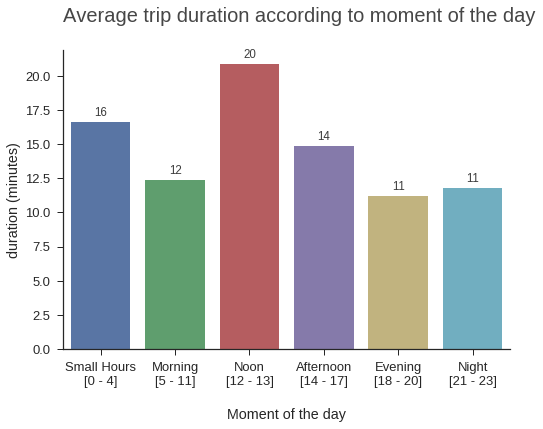

In [3]:
dfTripReduced['moment_of_day'] =  dfTripReduced.apply(getMomentOfDay, axis=1)

dfMomentOfDay = dfTripReduced[['moment_of_day', 'duration']]\
                                .groupby(by=['moment_of_day'])\
                                .agg('mean').reset_index()        

sns.set(font_scale=1.30)
sns.set_style('ticks')

bars = sns.barplot(y='duration',\
                   x='moment_of_day',\
                   order=['Small Hours', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night'],\
                   data=dfMomentOfDay)

sns.despine()

bars.set(ylabel='duration (minutes)',\
         xlabel='\nMoment of the day');

bars.set_xticklabels(['Small Hours\n[0 - 4]', 'Morning\n[5 - 11]', \
                      'Noon\n[12 - 13]', 'Afternoon\n[14 - 17]', \
                      'Evening\n[18 - 20]', 'Night\n[21 - 23]'])
bars.set_yticklabels

bars.set_title('Average trip duration according to moment of the day\n', size=20, loc='left', alpha=0.85);
autolabel(bars, 11.5, 0.9)
plt.show()

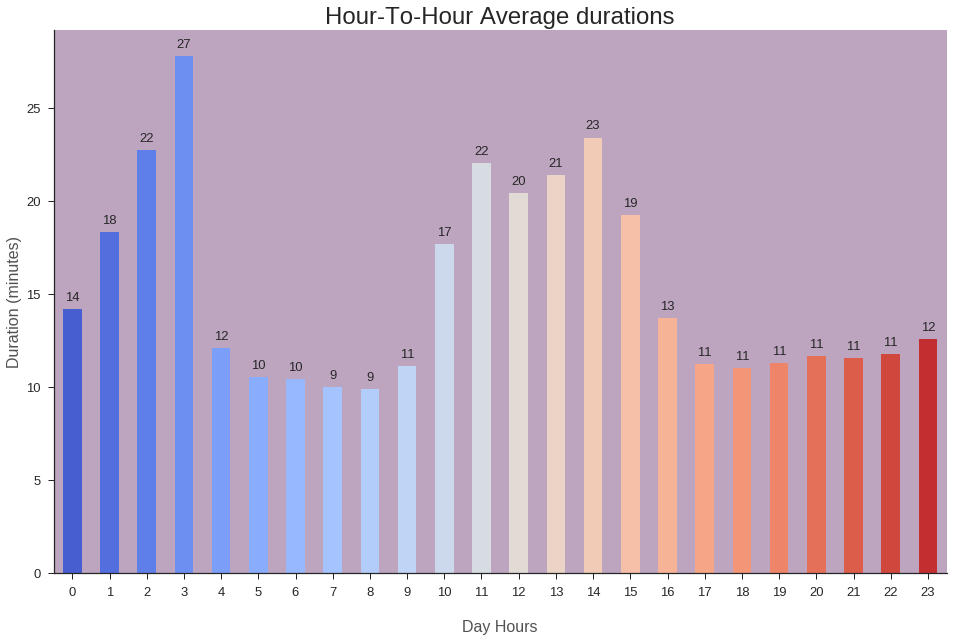

In [4]:
sns.set_style('ticks')

ax = dfTripReduced[['hour', 'duration']]\
            .groupby(by=['hour'])\
            .agg('mean')\
            .reset_index()\
            .plot(kind='bar',
                  x='hour',
                  y='duration',
                  figsize=(16,10), 
                  color=sns.color_palette("coolwarm", 24), 
                  legend=False,
                  rot=0)
            
sns.despine()
ax.set_title('Hour-To-Hour Average durations', fontsize=24)
ax.set_xlabel("\nDay Hours", fontsize=16, alpha=0.8)
ax.set_ylabel("Duration (minutes)", fontsize=16, alpha=0.8)
ax.set_facecolor('#916a96')
ax.patch.set_alpha(0.6)
autolabel(ax, 13, 1)
plt.show()

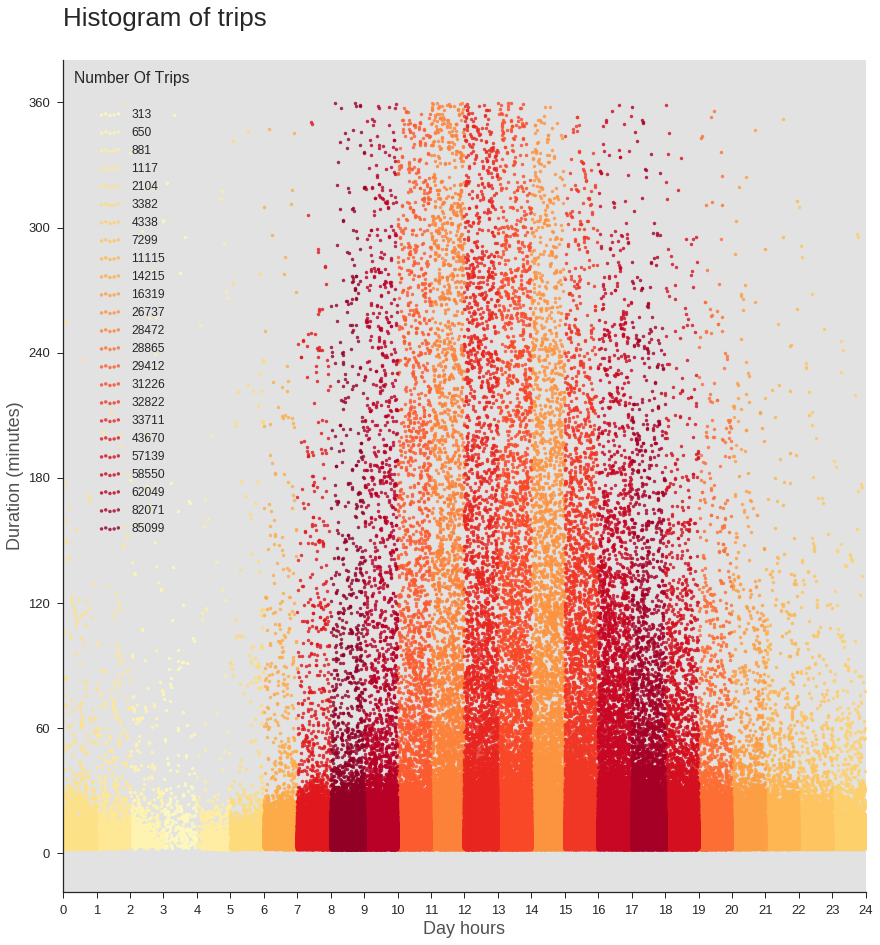

In [5]:
#Hago merge para tener los tres ejes: hora, duracion y cantidad de viajes por hora
dfMerged = dfTripReduced.merge(dfTripsByHour.reset_index(), on='hour')
dfMerged['floatHour'] = dfMerged.apply(lambda x: x.start_date.hour + float(x.start_date.minute)/60, axis=1)

sns.set_style("ticks", rc={'legend.scatterpoints': 5, 'legend.numpoints': 5})

graf = sns.lmplot(x='floatHour', y='duration',
           data=dfMerged,
           fit_reg=False,
           hue="trips",
           palette="YlOrRd",
           scatter_kws={"s":12},
           legend_out=False,
          )

plt.legend(loc='upper left', fontsize=12, title='Number Of Trips\n')
graf.fig.set_size_inches(15, 15)
graf.ax.patch.set_facecolor('#d6d6d6')
graf.ax.patch.set_alpha(0.7)
plt.title('Histogram of trips\n', fontsize=26, loc='left')
plt.xlabel('Day hours', fontsize=18, alpha=0.8)
plt.ylabel('Duration (minutes)', fontsize=18, alpha=0.8)
#En el eje X se representan las 24 horas del día y en Y rangos de a 60 minutos (1 hora)
graf.set(xlim=(0, 24), xticks=[x for x in range(25) ], yticks=[i * 60 for i in range(7)])
plt.show()